# RQ3 - Efficacy and Experience Measures

In [82]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 14})

In [83]:
df_demographics = pd.read_excel("./data/Questionnaire.xlsx", sheet_name="Demographics")

# transpose the dataframe
df_demographics = df_demographics.transpose()
# use first row as column names
df_demographics.columns = df_demographics.iloc[0]
#delete first row
df_demographics = df_demographics.drop(df_demographics.index[0])

#change all NaN to 0
#df_demographics = df_demographics.fillna(0)

# drop row with "Participant" being 9
df_demographics = df_demographics.drop(9)
df_demographics = df_demographics.drop(46)

df_demographics["age"] = df_demographics["age"].astype(float)

print(df_demographics["age"].describe())
print(df_demographics["sex"].value_counts())

#print(df_demographics.head(20))


count    36.000000
mean     26.027778
std       6.834727
min      19.000000
25%      21.750000
50%      25.000000
75%      27.250000
max      51.000000
Name: age, dtype: float64
male       31
female      5
diverse     1
Name: sex, dtype: int64


In [84]:
df_questionnaire = pd.read_excel("./data/Questionnaire.xlsx", sheet_name="Experience")
# transpose the dataframe
df_questionnaire = df_questionnaire.transpose()
# use first row as column names
df_questionnaire.columns = df_questionnaire.iloc[0]
#delete first row
df_questionnaire = df_questionnaire.drop(df_questionnaire.index[0])
#drop row where years of programming is missing
df_questionnaire = df_questionnaire.dropna(subset=["yearsAtWork"])
#change all NaN to 0
#df_questionnaire = df_questionnaire.fillna(0)

# drop row with "Participant" being 9
df_questionnaire = df_questionnaire.drop(9)
df_questionnaire = df_questionnaire.drop(46)

df_questionnaire["logicalExperience"] = df_questionnaire["logicalExperience"].astype(int)
df_questionnaire["functionalExperience"] = df_questionnaire["functionalExperience"].astype(int)
df_questionnaire["imperativExperience"] = df_questionnaire["imperativExperience"].astype(int)
df_questionnaire["objectExperience"] = df_questionnaire["objectExperience"].astype(float)

df_questionnaire["timeOverallParsed"] = pd.to_numeric(df_questionnaire["timeOverall"], errors='coerce')
df_questionnaire["timeLearningParsed"] = pd.to_numeric(df_questionnaire["timeLearning"], errors='coerce')
df_questionnaire["timeProgrammingParsed"] = pd.to_numeric(df_questionnaire["timeProgramming"], errors='coerce')
df_questionnaire["timeTestsParsed"] = pd.to_numeric(df_questionnaire["timeTests"], errors='coerce')
df_questionnaire["timeDeployParsed"] = pd.to_numeric(df_questionnaire["timeDeploy"], errors='coerce')
df_questionnaire["timeMentoringParsed"] = pd.to_numeric(df_questionnaire["timeMentoring"], errors='coerce')
df_questionnaire["timeMeetingParsed"] = pd.to_numeric(df_questionnaire["timeMeeting"], errors='coerce')
df_questionnaire["timeCodereviewParsed"] = pd.to_numeric(df_questionnaire["timeCodereview"], errors='coerce')
df_questionnaire["timeOtherParsed"] = pd.to_numeric(df_questionnaire["timeOther"], errors='coerce')

df_questionnaire["comparedToStudentParsed"] = pd.to_numeric(df_questionnaire["comparedToStudent"], errors='coerce')
df_questionnaire["comparedToProfessionalParsed"] = pd.to_numeric(df_questionnaire["comparedToProfessional"], errors='coerce')

df_questionnaire["yearsOfProgramming"] = df_questionnaire["yearsOfProgramming"].astype(float)
df_questionnaire["yearsOfProfessionalProgramming"] = df_questionnaire["yearsOfProfessionalProgramming"].astype(float)
df_questionnaire["yearsOfJava"] = df_questionnaire["yearsOfJava"].astype(float)

def label_atwork(string):
   if string == '0to5' :
      return 0
   if string == '5to10' :
      return 1
   if string == '10to15' :
      return 2
   if string == 'gr15' :
      return 3
   raise Exception('unknown value' + string)

df_questionnaire["noOfProgrammingLanguages"] = df_questionnaire.apply(lambda row: len(row["allProgramminglanguages"].split(',')), axis=1) 
df_questionnaire["yearsAtWorkCategory"] = df_questionnaire.apply(lambda row: label_atwork(row["yearsAtWork"]), axis=1)


print(df_questionnaire["yearsOfProgramming"].describe())
print(df_questionnaire["yearsOfProfessionalProgramming"].describe())
print(df_questionnaire["yearsOfJava"].describe())

print(df_questionnaire["timeProgrammingParsed"].to_list())

print(df_questionnaire.head(40))

count    37.000000
mean      7.932432
std       6.142025
min       1.000000
25%       4.000000
50%       7.000000
75%       9.000000
max      30.000000
Name: yearsOfProgramming, dtype: float64
count    37.000000
mean      3.554054
std       4.300814
min       0.000000
25%       0.000000
50%       2.000000
75%       5.000000
max      20.000000
Name: yearsOfProfessionalProgramming, dtype: float64
count    37.000000
mean      4.540541
std       4.311449
min       0.000000
25%       1.000000
50%       4.000000
75%       7.000000
max      20.000000
Name: yearsOfJava, dtype: float64
[1.0, nan, nan, 5.0, 20.0, 15.0, 10.0, 5.0, 5.0, 4.0, nan, 13.0, 15.0, 20.0, 34.0, 10.0, 15.0, 10.0, 15.0, 30.0, nan, 20.0, 10.0, nan, nan, nan, 3.5, 12.0, nan, nan, 15.0, 10.0, 50.0, nan, 4.0, 12.0, nan]
QuestionLabel\Participant: yearsAtWork  yearsOfProgramming  \
1                                5to10                 7.0   
2                                5to10                 6.0   
3                        

## Check Correlation Effects

In [85]:
# calculate the pearson correlation between the years of programming and the years of java
corr = df_questionnaire.corr(method="pearson")
corr.values[[np.arange(corr.shape[0])] * 2] = 0
corr

C:\Users\norma\AppData\Local\Temp/ipykernel_19172/637454445.py:3: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  corr.values[[np.arange(corr.shape[0])] * 2] = 0


QuestionLabel\Participant:,yearsOfProgramming,yearsOfProfessionalProgramming,yearsOfJava,logicalExperience,functionalExperience,imperativExperience,objectExperience,timeOverallParsed,timeLearningParsed,timeProgrammingParsed,timeTestsParsed,timeDeployParsed,timeMentoringParsed,timeMeetingParsed,timeCodereviewParsed,timeOtherParsed,comparedToStudentParsed,comparedToProfessionalParsed,noOfProgrammingLanguages,yearsAtWorkCategory
QuestionLabel\Participant:,,,,,,,,,,,,,,,,,,,,
yearsOfProgramming,0.000000,0.911321,0.835610,0.182844,0.259578,0.271454,0.486959,0.159387,-0.233884,0.010186,0.147425,0.687965,0.453792,0.321468,0.158970,0.028231,5.253185e-02,0.392316,4.082698e-01,0.865630
yearsOfProfessionalProgramming,0.911321,0.000000,0.756015,0.147787,0.132080,0.176632,0.495947,0.192143,-0.187794,0.111110,0.298463,0.720305,0.512038,0.250377,0.217021,-0.131502,1.030086e-01,0.423498,4.634681e-01,0.813539
yearsOfJava,0.835610,0.756015,0.000000,0.100511,0.308483,0.177705,0.400455,0.026563,-0.288017,-0.239264,0.063837,0.716789,0.272218,0.282913,0.074355,0.166733,5.899217e-03,0.381796,5.261412e-01,0.749374
logicalExperience,0.182844,0.147787,0.100511,0.000000,0.424902,0.342763,0.155347,0.396452,0.645064,0.160976,-0.102192,0.121946,0.151651,-0.060671,-0.096242,0.048731,2.148345e-01,0.332080,1.139646e-01,-0.025199
functionalExperience,0.259578,0.132080,0.308483,0.424902,0.000000,0.268350,0.342997,0.212700,0.323230,-0.173805,-0.232429,0.082596,0.112396,0.095883,-0.098503,0.374071,-4.112581e-02,0.310941,3.570362e-01,0.149932
imperativExperience,0.271454,0.176632,0.177705,0.342763,0.268350,0.000000,0.425480,0.263376,0.168509,0.195534,-0.425506,-0.310227,0.245510,0.095474,0.144914,0.303281,2.328890e-02,0.331032,3.373175e-01,0.155945
objectExperience,0.486959,0.495947,0.400455,0.155347,0.342997,0.425480,0.000000,0.008985,-0.335692,0.184769,0.180157,0.138851,0.193221,0.046264,0.144414,0.182993,7.423710e-02,0.459176,5.113112e-01,0.385955
timeOverallParsed,0.159387,0.192143,0.026563,0.396452,0.212700,0.263376,0.008985,0.000000,0.452438,0.572262,0.135237,0.179413,0.307777,0.487450,0.513886,0.225697,4.788185e-01,0.436790,1.221190e-02,0.202127
timeLearningParsed,-0.233884,-0.187794,-0.288017,0.645064,0.323230,0.168509,-0.335692,0.452438,0.000000,0.099743,-0.140178,-0.149856,-0.107032,-0.153826,-0.127509,-0.056888,4.204665e-01,0.234165,-8.345855e-02,-0.301728


In [86]:
df_behavioral = pd.read_csv("./data/filtered_data_jonas.csv")

# drop unnamed column
df_behavioral = df_behavioral[df_behavioral["Subpart"] == "Code"]
df_behavioral["Behavioral"] = df_behavioral["Behavioral"].apply(lambda x: "Right" if x == "Right" else "Wrong")
df_behavioral["Duration"] = df_behavioral["EndTime"] - df_behavioral["StartTime"]
 
# remove participant 46 for being an outlier
df_behavioral.drop(df_behavioral[df_behavioral['Participant'] == 46].index,inplace=True)

In [87]:
print(df_behavioral["Duration"].count())

lowest = df_behavioral["Duration"].quantile(0.05)
highest = df_behavioral["Duration"].quantile(0.95)

print(lowest)
print(highest)

print(df_behavioral["Duration"].describe())
# kick out all rows where the duration is not in the 5% quantile range
#df_behavioral["IsOutlier"] = True
#df_behavioral.loc[((df_behavioral["Duration"] > lowest) & (df_behavioral["Duration"] < highest))
                  #| (df_behavioral["Duration"] <= lowest) & (
                          #df_behavioral["Behavioral"] == "Right"), "IsOutlier"] = False

1072
11.272930550025194
152.5334965149872
count    1072.000000
mean       56.017341
std        41.626693
min         4.215789
25%        25.475966
50%        43.102299
75%        76.418643
max       180.079868
Name: Duration, dtype: float64


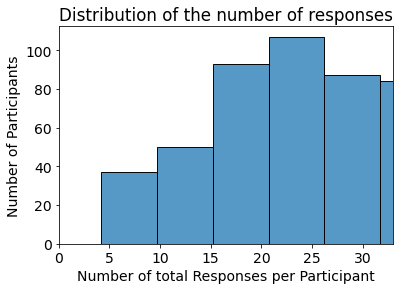

In [88]:
#df_tmp = df_behavioral.groupby("Participant")\
#    .apply(lambda df: len(df[df["IsOutlier"] == False]))\
#    .to_frame("Duration")

# create a histogram of the duration of the snippets
g = sns.histplot(df_behavioral["Duration"], bins=32, label="Participants")
g.set_xlabel("Number of total Responses per Participant")
g.set_ylabel("Number of Participants")
g.set_title("Distribution of the number of responses")
g.set_xlim(0, 33);

In [89]:
df_behavioral = df_behavioral.set_index("Participant", drop=True)

print(df_behavioral.head(10))



                       Algorithm Subpart Behavioral    StartTime      EndTime  \
Participant                                                                     
1                        IsPrime    Code      Right     0.000000    12.390280   
1            SiebDesEratosthenes    Code      Wrong    49.778238   202.350152   
1                      IsAnagram    Code      Right   254.122970   363.738694   
1               RemoveDoubleChar    Code      Right   401.629505   455.085781   
1                   BinToDecimal    Code      Right   555.252914   605.175005   
1                  PermuteString    Code      Wrong   661.797211   771.685760   
1                          Power    Code      Right   826.105263   844.079390   
1                   BinarySearch    Code      Wrong   897.039234   944.809878   
1              ContainsSubstring    Code      Right  1061.359192  1103.405845   
1                   ReverseArray    Code      Right  1147.574577  1207.601749   

                           

In [90]:
df_snippets_correct_overall = df_behavioral.groupby(["Behavioral"]).size()
print(df_snippets_correct_overall.head())

df_snippets_correct = df_behavioral.groupby(["Algorithm", "Behavioral"]).size()

df_snippets_mean = df_behavioral.groupby("Algorithm").mean()
df_snippets_std = df_behavioral.groupby("Algorithm").std()

#print(df_behavioral.describe())
#print(df_snippets_mean.head(5))
print(df_snippets_correct.head(5))

snippets = df_snippets_mean.index.values.tolist()

ov_right = 0
ov_overall = 0
for snippet in snippets:
    print(snippet)
    
    right = df_snippets_correct.loc[snippet,"Right"]
    wrong = 0
    try:
        wrong = df_snippets_correct.loc[snippet,"Wrong"]
    except:
        pass
    overall = df_snippets_correct.loc[snippet,"Right"] + wrong

    ov_right += right
    ov_overall += overall

    print(str(right) + "/" + str(overall) + " (" + "{:.0f}".format((right/overall)*100)  + "\%) & " + "{:.2f}".format(df_snippets_mean.loc[snippet]["Duration"]) + " $\pm$ " + "{:.2f}".format(df_snippets_std.loc[snippet]["Duration"]))
    print('\n')

print(ov_right)
print(ov_overall)

Behavioral
Right    789
Wrong    283
dtype: int64
Algorithm     Behavioral
Ackerman      Right          5
              Wrong         31
ArrayAverage  Right         30
              Wrong          5
BinToDecimal  Right         13
dtype: int64
Ackerman
5/36 (14\%) & 83.51 $\pm$ 53.16


ArrayAverage
30/35 (86\%) & 31.29 $\pm$ 17.03


BinToDecimal
13/35 (37\%) & 62.18 $\pm$ 25.27


BinarySearch
13/35 (37\%) & 55.57 $\pm$ 31.16


BinomialCoefficient
10/32 (31\%) & 77.70 $\pm$ 39.83


BogoSort
24/35 (69\%) & 79.64 $\pm$ 42.77


CheckIfLettersOnly
32/33 (97\%) & 36.81 $\pm$ 22.69


ContainsSubstring
31/32 (97\%) & 56.36 $\pm$ 29.74


DropNumber
15/36 (42\%) & 55.19 $\pm$ 25.67


DumpSorting
30/34 (88\%) & 61.85 $\pm$ 32.32


GreatestCommonDivisor
29/31 (94\%) & 70.86 $\pm$ 32.40


HIndex
19/33 (58\%) & 100.60 $\pm$ 44.14


HeightOfTree
26/34 (76\%) & 41.81 $\pm$ 23.63


InsertSort
34/35 (97\%) & 67.40 $\pm$ 38.21


IsAnagram
26/30 (87\%) & 101.70 $\pm$ 44.67


IsPrime
30/35 (86\%) & 21.67 $\

In [91]:
df_behavioral["SumCorrect"] = df_behavioral.groupby("Participant")\
    .apply(lambda df: len(df[df["Behavioral"] == "Right"]))

df_behavioral["Total"] = df_behavioral.groupby("Participant").apply(lambda df: len(df))

df_behavioral["SumDurationInMinutes"] = pd.read_csv("./data/filtered_data_jonas.csv")\
    .groupby("Participant")\
    .apply(lambda df: df["EndTime"].array[-1] - df["StartTime"].array[0] + 30.0)

df_behavioral["SkillScore"] = df_behavioral["SumCorrect"] / (df_behavioral["SumDurationInMinutes"] / 60.0)

In [92]:
df_behavioral[~df_behavioral.index.duplicated(keep='first')]["SumDurationInMinutes"]

Participant
1     4013.279641
2     4144.059902
3     2535.910764
4     3985.479718
5     3863.480571
6     4018.194175
7     4021.702411
10    3454.733665
11    4070.273653
12    4104.600060
13    4176.217116
14    4202.448496
18    4279.459799
22    4247.962996
24    3984.307315
25    4331.132959
28    4140.462543
35    2496.782760
36    3764.501752
37    4298.087901
38    3227.601457
41    4223.502276
42    4658.015541
49    4239.946382
50    4157.481758
55    4152.392179
58    4272.951816
59    4226.120565
60    4364.798324
61    4344.790617
62    4268.889176
63    4173.298634
66    3049.293793
67    4185.514052
68    2659.274382
70    4436.403413
71    3473.124016
Name: SumDurationInMinutes, dtype: float64

In [93]:
df_skill = df_behavioral[~df_behavioral.index.duplicated(keep='first')]
df_skill = df_skill.drop(columns=["Algorithm", "Behavioral", "Duration"])
df_skill

,Subpart,StartTime,EndTime,Eyetracking,EEG,SumCorrect,Total,SumDurationInMinutes,SkillScore
Participant,,,,,,,,,
1,Code,0.0,12.390280,./data/filteredData/Participant01/IsPrimecode_...,./data/filteredData/Participant01/IsPrimecode_...,22,32,4013.279641,0.328908
2,Code,0.0,40.635115,./data/filteredData/Participant02/HeightOfTree...,./data/filteredData/Participant02/HeightOfTree...,26,32,4144.059902,0.376442
3,Code,0.0,92.877823,./data/filteredData/Participant03/SiebDesErato...,./data/filteredData/Participant03/SiebDesErato...,14,16,2535.910764,0.331242
4,Code,0.0,94.990470,./data/filteredData/Participant04/HIndexcode_e...,./data/filteredData/Participant04/HIndexcode_e...,28,32,3985.479718,0.421530
5,Code,0.0,109.680191,./data/filteredData/Participant05/SiebDesErato...,./data/filteredData/Participant05/SiebDesErato...,20,32,3863.480571,0.310601
6,Code,0.0,28.998734,./data/filteredData/Participant06/RemoveDouble...,./data/filteredData/Participant06/RemoveDouble...,21,29,4018.194175,0.313574
7,Code,0.0,28.138863,./data/filteredData/Participant07/InsertSortco...,./data/filteredData/Participant07/InsertSortco...,29,32,4021.702411,0.432653
10,Code,0.0,31.310999,./data/filteredData/Participant10/ContainsSubs...,./data/filteredData/Participant10/ContainsSubs...,20,32,3454.733665,0.347349
11,Code,0.0,51.498158,./data/filteredData/Participant11/DumpSortingc...,./data/filteredData/Participant11/DumpSortingc...,15,24,4070.273653,0.221115


In [94]:
df_skill.describe()

,StartTime,EndTime,SumCorrect,Total,SumDurationInMinutes,SkillScore
count,37.0,37.000000,37.000000,37.000000,37.000000,37.000000
mean,0.0,56.987013,21.324324,28.972973,3952.607475,0.331412
std,0.0,49.216489,4.870855,3.840475,527.793165,0.097086
min,0.0,10.538237,11.000000,16.000000,2496.782760,0.155662
25%,0.0,24.274830,18.000000,27.000000,3984.307315,0.286703
50%,0.0,36.052612,21.000000,30.000000,4152.392179,0.321073
75%,0.0,70.163245,25.000000,32.000000,4247.962996,0.382521
max,0.0,180.050434,31.000000,32.000000,4658.015541,0.648835


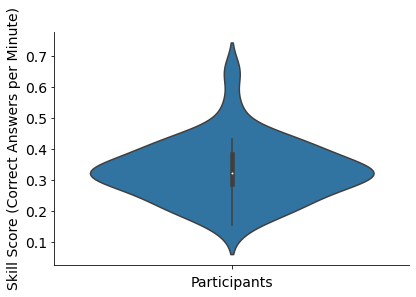

In [95]:
g = sns.violinplot(y="SkillScore", data=df_skill, inner="box")
g.set_xlabel("Participants")
g.set_ylabel("Skill Score (Correct Answers per Minute)")

g.spines['right'].set_visible(False)
g.spines['top'].set_visible(False)

plt.tight_layout()
plt.savefig('SkillScoreDistribution.pdf', dpi=300, bbox_inches='tight', pad_inches=0)

In [96]:
# check if correct_per_time is normal distributed with shapiro-wilk test
import scipy

scipy.stats.shapiro(df_skill["SkillScore"])

ShapiroResult(statistic=0.9399625062942505, pvalue=0.04600061476230621)

In [97]:
df_behavioral.to_csv("./data/filteredData/filtered_data.csv")

In [98]:
df_skill

,Subpart,StartTime,EndTime,Eyetracking,EEG,SumCorrect,Total,SumDurationInMinutes,SkillScore
Participant,,,,,,,,,
1,Code,0.0,12.390280,./data/filteredData/Participant01/IsPrimecode_...,./data/filteredData/Participant01/IsPrimecode_...,22,32,4013.279641,0.328908
2,Code,0.0,40.635115,./data/filteredData/Participant02/HeightOfTree...,./data/filteredData/Participant02/HeightOfTree...,26,32,4144.059902,0.376442
3,Code,0.0,92.877823,./data/filteredData/Participant03/SiebDesErato...,./data/filteredData/Participant03/SiebDesErato...,14,16,2535.910764,0.331242
4,Code,0.0,94.990470,./data/filteredData/Participant04/HIndexcode_e...,./data/filteredData/Participant04/HIndexcode_e...,28,32,3985.479718,0.421530
5,Code,0.0,109.680191,./data/filteredData/Participant05/SiebDesErato...,./data/filteredData/Participant05/SiebDesErato...,20,32,3863.480571,0.310601
6,Code,0.0,28.998734,./data/filteredData/Participant06/RemoveDouble...,./data/filteredData/Participant06/RemoveDouble...,21,29,4018.194175,0.313574
7,Code,0.0,28.138863,./data/filteredData/Participant07/InsertSortco...,./data/filteredData/Participant07/InsertSortco...,29,32,4021.702411,0.432653
10,Code,0.0,31.310999,./data/filteredData/Participant10/ContainsSubs...,./data/filteredData/Participant10/ContainsSubs...,20,32,3454.733665,0.347349
11,Code,0.0,51.498158,./data/filteredData/Participant11/DumpSortingc...,./data/filteredData/Participant11/DumpSortingc...,15,24,4070.273653,0.221115


In [99]:
df_questionnaire

QuestionLabel\Participant:,yearsAtWork,yearsOfProgramming,yearsOfProfessionalProgramming,allProgramminglanguages,mostExperienceProgramminglanguages,currentProgrammingLanguage,yearsOfJava,logicalExperience,functionalExperience,imperativExperience,...,timeTestsParsed,timeDeployParsed,timeMentoringParsed,timeMeetingParsed,timeCodereviewParsed,timeOtherParsed,comparedToStudentParsed,comparedToProfessionalParsed,noOfProgrammingLanguages,yearsAtWorkCategory
1,5to10,7.0,2.0,"Java, Python, R, C","Java, R",R,6.0,1,2,3,...,0.0,0.0,1.0,4.0,1.0,0.0,3.0,2.0,4,1
2,5to10,6.0,5.0,"Java, Python, Javascript, Angular, Android(jav...","Java, Angular",Flutter,4.0,1,1,2,...,NaN,NaN,NaN,NaN,NaN,NaN,4.0,2.0,8,1
3,5to10,10.0,0.0,"Java,Python, Rust, Haskell, C, C#","Java, Python",-,4.0,1,4,4,...,NaN,NaN,NaN,NaN,NaN,NaN,3.0,2.0,6,1
4,0to5,7.0,4.0,"Java, Python, c, javascript, typescript, vba","python, java, vba","python, vba",7.0,1,2,2,...,4.0,2.0,0.0,0.0,2.0,0.0,4.0,2.0,6,0
5,5to10,8.0,4.0,"C#, PLISQL, TSQL, Rubyca","C#,PLISQL","C#, TSQL",0.0,1,1,1,...,12.0,2.0,0.5,2.0,1.0,0.0,4.0,3.0,4,1
6,gr15,20.0,10.0,"C, Java, Python, js, Latex, Assembly","Java, Python","Java, Python",10.0,2,2,5,...,0.0,0.0,0.0,0.5,0.0,0.0,NaN,NaN,6,3
7,0to5,7.0,0.0,"Java, C, C++, Python, SML, Delphi",Java,Java,7.0,2,4,5,...,0.0,0.0,0.0,7.0,0.0,28.0,4.0,4.0,6,0
10,5to10,7.0,6.0,"Html, Css, Javascript, Php, MySqL, Java, Pytho...","Java, MySQL","Java, C, C++, Html, Javascript, Css",7.0,1,3,4,...,2.0,1.0,0.0,1.0,1.0,0.0,2.0,4.0,9,1
11,0to5,8.0,3.0,"Python, Java, C, C++","Python, C","Python, C",4.0,2,1,4,...,0.0,0.0,0.0,2.0,0.0,0.0,3.0,2.0,4,0
12,0to5,7.0,1.0,"Java, Javascript, Python, PHP",Java,"Java, Javascript",5.0,1,3,3,...,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,4,0


In [100]:
df_skill_exp = pd.merge(df_questionnaire, df_skill, left_index=True, right_index=True)

print(df_questionnaire['comparedToStudentParsed'].describe())
print(df_questionnaire['comparedToProfessionalParsed'].describe())
print(df_questionnaire['noOfProgrammingLanguages'].describe())
print(df_questionnaire['timeOverallParsed'].describe())
print(df_questionnaire['timeProgrammingParsed'].describe())

print(df_questionnaire.shape)
print(df_skill.shape)
#print(df_skill_exp.head(5))
print(df_skill_exp.shape)

df_skill_exp

count    36.000000
mean      3.666667
std       0.755929
min       2.000000
25%       3.000000
50%       4.000000
75%       4.000000
max       5.000000
Name: comparedToStudentParsed, dtype: float64
count    36.000000
mean      2.250000
std       0.937321
min       1.000000
25%       2.000000
50%       2.000000
75%       3.000000
max       4.000000
Name: comparedToProfessionalParsed, dtype: float64
count    37.000000
mean      5.108108
std       2.024623
min       2.000000
25%       4.000000
50%       4.000000
75%       6.000000
max      10.000000
Name: noOfProgrammingLanguages, dtype: float64
count    26.000000
mean     33.038462
std      17.689501
min       5.000000
25%      16.000000
50%      40.000000
75%      40.000000
max      70.000000
Name: timeOverallParsed, dtype: float64
count    26.000000
mean     13.980769
std      10.726118
min       1.000000
25%       6.250000
50%      12.000000
75%      15.000000
max      50.000000
Name: timeProgrammingParsed, dtype: float64
(37, 62)
(37

,yearsAtWork,yearsOfProgramming,yearsOfProfessionalProgramming,allProgramminglanguages,mostExperienceProgramminglanguages,currentProgrammingLanguage,yearsOfJava,logicalExperience,functionalExperience,imperativExperience,...,yearsAtWorkCategory,Subpart,StartTime,EndTime,Eyetracking,EEG,SumCorrect,Total,SumDurationInMinutes,SkillScore
1,5to10,7.0,2.0,"Java, Python, R, C","Java, R",R,6.0,1,2,3,...,1,Code,0.0,12.390280,./data/filteredData/Participant01/IsPrimecode_...,./data/filteredData/Participant01/IsPrimecode_...,22,32,4013.279641,0.328908
2,5to10,6.0,5.0,"Java, Python, Javascript, Angular, Android(jav...","Java, Angular",Flutter,4.0,1,1,2,...,1,Code,0.0,40.635115,./data/filteredData/Participant02/HeightOfTree...,./data/filteredData/Participant02/HeightOfTree...,26,32,4144.059902,0.376442
3,5to10,10.0,0.0,"Java,Python, Rust, Haskell, C, C#","Java, Python",-,4.0,1,4,4,...,1,Code,0.0,92.877823,./data/filteredData/Participant03/SiebDesErato...,./data/filteredData/Participant03/SiebDesErato...,14,16,2535.910764,0.331242
4,0to5,7.0,4.0,"Java, Python, c, javascript, typescript, vba","python, java, vba","python, vba",7.0,1,2,2,...,0,Code,0.0,94.990470,./data/filteredData/Participant04/HIndexcode_e...,./data/filteredData/Participant04/HIndexcode_e...,28,32,3985.479718,0.421530
5,5to10,8.0,4.0,"C#, PLISQL, TSQL, Rubyca","C#,PLISQL","C#, TSQL",0.0,1,1,1,...,1,Code,0.0,109.680191,./data/filteredData/Participant05/SiebDesErato...,./data/filteredData/Participant05/SiebDesErato...,20,32,3863.480571,0.310601
6,gr15,20.0,10.0,"C, Java, Python, js, Latex, Assembly","Java, Python","Java, Python",10.0,2,2,5,...,3,Code,0.0,28.998734,./data/filteredData/Participant06/RemoveDouble...,./data/filteredData/Participant06/RemoveDouble...,21,29,4018.194175,0.313574
7,0to5,7.0,0.0,"Java, C, C++, Python, SML, Delphi",Java,Java,7.0,2,4,5,...,0,Code,0.0,28.138863,./data/filteredData/Participant07/InsertSortco...,./data/filteredData/Participant07/InsertSortco...,29,32,4021.702411,0.432653
10,5to10,7.0,6.0,"Html, Css, Javascript, Php, MySqL, Java, Pytho...","Java, MySQL","Java, C, C++, Html, Javascript, Css",7.0,1,3,4,...,1,Code,0.0,31.310999,./data/filteredData/Participant10/ContainsSubs...,./data/filteredData/Participant10/ContainsSubs...,20,32,3454.733665,0.347349
11,0to5,8.0,3.0,"Python, Java, C, C++","Python, C","Python, C",4.0,2,1,4,...,0,Code,0.0,51.498158,./data/filteredData/Participant11/DumpSortingc...,./data/filteredData/Participant11/DumpSortingc...,15,24,4070.273653,0.221115
12,0to5,7.0,1.0,"Java, Javascript, Python, PHP",Java,"Java, Javascript",5.0,1,3,3,...,0,Code,0.0,159.448936,./data/filteredData/Participant12/RabbitTortoi...,./data/filteredData/Participant12/RabbitTortoi...,21,28,4104.600060,0.306973


  yearsAtWork  yearsOfProgramming  yearsOfProfessionalProgramming  \
1       5to10                 7.0                             2.0   
2       5to10                 6.0                             5.0   
3       5to10                10.0                             0.0   
4        0to5                 7.0                             4.0   
5       5to10                 8.0                             4.0   

                             allProgramminglanguages  \
1                                 Java, Python, R, C   
2  Java, Python, Javascript, Angular, Android(jav...   
3                  Java,Python, Rust, Haskell, C, C#   
4       Java, Python, c, javascript, typescript, vba   
5                           C#, PLISQL, TSQL, Rubyca   

  mostExperienceProgramminglanguages currentProgrammingLanguage  yearsOfJava  \
1                            Java, R                          R          6.0   
2                      Java, Angular                    Flutter          4.0   
3       

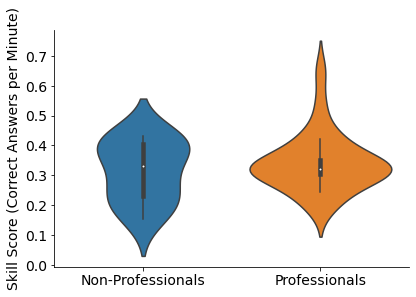

In [101]:
df_skill_exp['Pro'] = df_skill_exp.apply(lambda row: np.isnan(row['timeOverallParsed'])  == False, axis=1)

print(df_skill_exp.head(5))
print(df_skill_exp[df_skill_exp['Pro'] == True].shape)

g = sns.violinplot(y = 'SkillScore', x='Pro', data=df_skill_exp, inner="box")
g.set_xticklabels(["Non-Professionals", "Professionals"])
g.set_xlabel("")
g.set_ylabel("Skill Score (Correct Answers per Minute)")

g.spines['right'].set_visible(False)
g.spines['top'].set_visible(False)

plt.tight_layout()
plt.savefig('SkillScoreDistributionExpNonexp.pdf', dpi=300, bbox_inches='tight', pad_inches=0)

C:\Users\norma\AppData\Local\Temp/ipykernel_19172/1329883207.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_skill_exp_plot['Occupational Status'] = df_skill_exp_plot['Pro'].map({True: 'Professionals', False: 'Non-Professionals'})
C:\Users\norma\AppData\Local\Temp/ipykernel_19172/1329883207.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_skill_exp_plot['SumDurationInMinutes'] = df_skill_exp_plot['SumDurationInMinutes'].apply(lambda x: x/100)


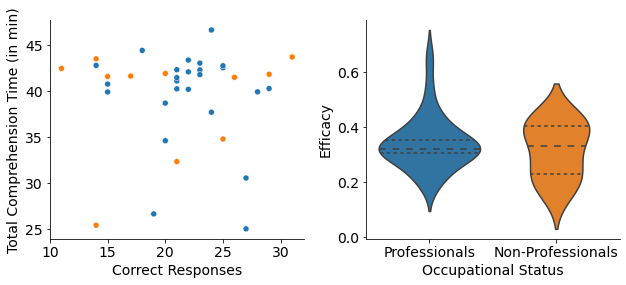

In [110]:
_, axes = plt.subplots(1, 2, sharey=False, figsize=(9, 4))

df_skill_exp_plot = df_skill_exp[["SumCorrect", 'SkillScore', "SumDurationInMinutes", 'Pro']]
df_skill_exp_plot['Occupational Status'] = df_skill_exp_plot['Pro'].map({True: 'Professionals', False: 'Non-Professionals'})
df_skill_exp_plot['SumDurationInMinutes'] = df_skill_exp_plot['SumDurationInMinutes'].apply(lambda x: x/100)

sns.scatterplot(x="SumCorrect", y="SumDurationInMinutes", hue='Occupational Status', data=df_skill_exp_plot, ax=axes[0], legend=False)
axes[0].set_xlabel("Correct Responses")
axes[0].set_ylabel("∑ Comprehension Time (in min)")

sns.violinplot(y = 'SkillScore', x='Occupational Status', data=df_skill_exp_plot, split=False, inner="quartile", ax=axes[1])
#sns.violinplot(y = 'SkillScore', data=df_skill_exp_plot, split=False, inner="quart", ax=axes[1])
axes[1].set_ylabel("Efficacy")

sns.despine(left=False, bottom=False)

plt.tight_layout()
plt.savefig('EfficacyDistribution.pdf', dpi=300, bbox_inches='tight', pad_inches=0)

In [103]:

from scipy import stats

print(stats.mannwhitneyu(df_skill_exp[df_skill_exp['Pro'] == True]['SkillScore'], df_skill_exp[df_skill_exp['Pro'] == False]['SkillScore']))

MannwhitneyuResult(statistic=127.0, pvalue=0.36564190309134526)


In [104]:
df_skill_exp_corr = df_skill_exp.corr('spearman')
df_skill_exp_corr.to_csv('ExpCorr.csv', sep=';')
df_skill_exp_corr

,yearsOfProgramming,yearsOfProfessionalProgramming,yearsOfJava,logicalExperience,functionalExperience,imperativExperience,objectExperience,timeOverallParsed,timeLearningParsed,timeProgrammingParsed,...,comparedToProfessionalParsed,noOfProgrammingLanguages,yearsAtWorkCategory,StartTime,EndTime,SumCorrect,Total,SumDurationInMinutes,SkillScore,Pro
yearsOfProgramming,1.000000,0.701202,0.744174,0.230829,0.327709,0.364500,0.616422,0.149803,-0.445824,0.027865,...,0.498005,0.654240,0.707273,NaN,-0.102689,0.151449,0.138470,-0.207320,0.153062,0.382562
yearsOfProfessionalProgramming,0.701202,1.000000,0.563815,0.140708,0.033470,0.212283,0.662572,0.214013,-0.443124,0.341721,...,0.478969,0.680891,0.661497,NaN,-0.156598,0.328792,0.308594,0.007201,0.144814,0.519696
yearsOfJava,0.744174,0.563815,1.000000,0.231916,0.372788,0.306747,0.450693,-0.004163,-0.434073,-0.213438,...,0.324477,0.671742,0.602297,NaN,-0.229543,0.173200,0.163993,-0.026784,0.035324,0.332657
logicalExperience,0.230829,0.140708,0.231916,1.000000,0.412188,0.355918,0.206494,0.354028,0.299703,0.146694,...,0.388542,0.250881,-0.008457,NaN,-0.077732,0.085624,-0.045990,0.028572,0.069188,0.082122
functionalExperience,0.327709,0.033470,0.372788,0.412188,1.000000,0.225610,0.300784,0.208355,0.058749,-0.218508,...,0.291054,0.417300,0.138169,NaN,-0.056416,0.162034,0.143436,-0.061776,0.217758,0.148080
imperativExperience,0.364500,0.212283,0.306747,0.355918,0.225610,1.000000,0.441591,0.330165,0.143340,0.250782,...,0.361224,0.415208,0.189639,NaN,-0.273636,0.288102,0.023614,-0.031945,0.327058,0.171671
objectExperience,0.616422,0.662572,0.450693,0.206494,0.300784,0.441591,1.000000,0.047674,-0.420177,0.287231,...,0.477903,0.606989,0.449896,NaN,0.031752,0.344648,0.185561,0.075693,0.165658,0.450057
timeOverallParsed,0.149803,0.214013,-0.004163,0.354028,0.208355,0.330165,0.047674,1.000000,0.291041,0.633770,...,0.496367,0.174769,0.266737,NaN,-0.316805,0.538550,0.446515,-0.054839,0.428457,NaN
timeLearningParsed,-0.445824,-0.443124,-0.434073,0.299703,0.058749,0.143340,-0.420177,0.291041,1.000000,0.125024,...,0.107261,-0.229310,-0.499785,NaN,-0.029031,0.203344,-0.153340,-0.083996,0.317018,NaN
timeProgrammingParsed,0.027865,0.341721,-0.213438,0.146694,-0.218508,0.250782,0.287231,0.633770,0.125024,1.000000,...,0.331962,0.034916,0.232707,NaN,-0.136438,0.213745,0.147855,0.052715,0.058141,NaN
